# Setup

In [ ]:
!pip install imbalanced-learn
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    ConfusionMatrixDisplay
)

from imblearn.over_sampling import SMOTE
import category_encoders as ce
import joblib


# Load dữ liệu đầu vào
# https://www.kaggle.com/competitions/customer-churn-prediction-2020/overview



In [ ]:
customer_data = pd.read_csv("/content/train.csv")

In [ ]:
customer_data

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [ ]:
customer_data['international_plan_yes'] = customer_data['international_plan'].map({'yes': 1, 'no': 0})
customer_data['churn_yes'] = customer_data['churn'].map({'yes': 1, 'no': 0})

# Kiểm tra Null, duplicates . Lấy ra các cột dữ liệu object và !object

In [ ]:
customer_data.isnull().sum()

,0
state,0
account_length,0
area_code,0
international_plan,0
voice_mail_plan,0
number_vmail_messages,0
total_day_minutes,0
total_day_calls,0
total_day_charge,0
total_eve_minutes,0


In [ ]:
customer_data.duplicated().sum()

np.int64(0)

In [ ]:
object_cols = [f for f in customer_data.columns if customer_data[f].dtype =="O"]
print(object_cols)

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']


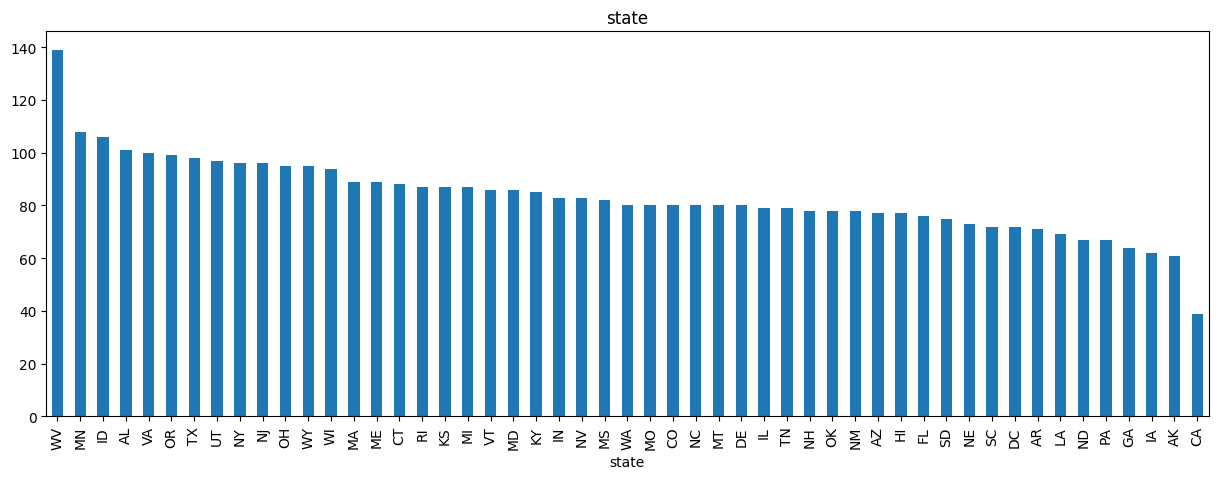

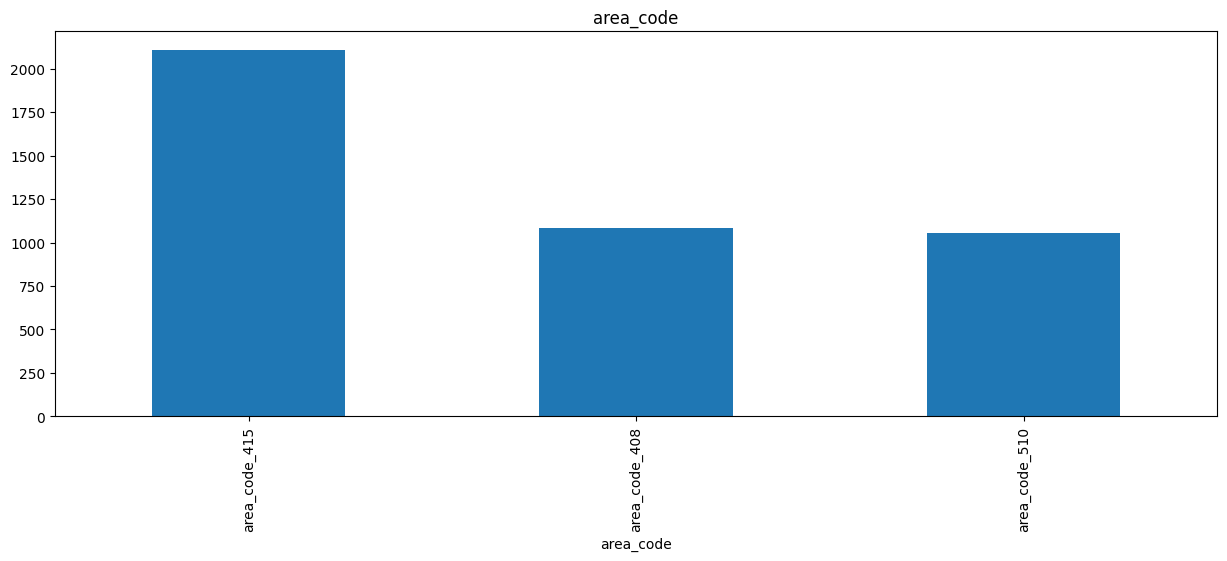

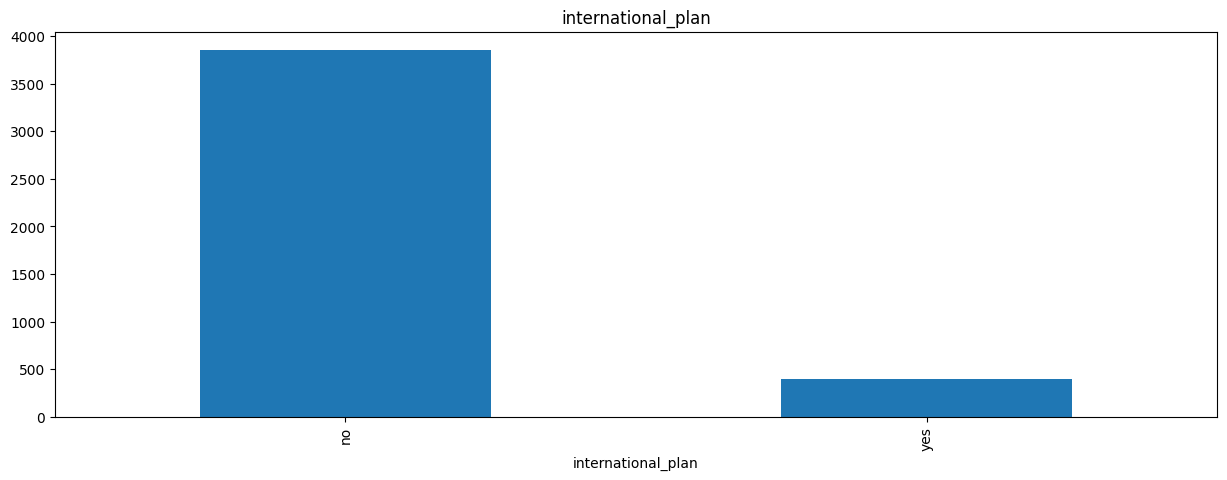

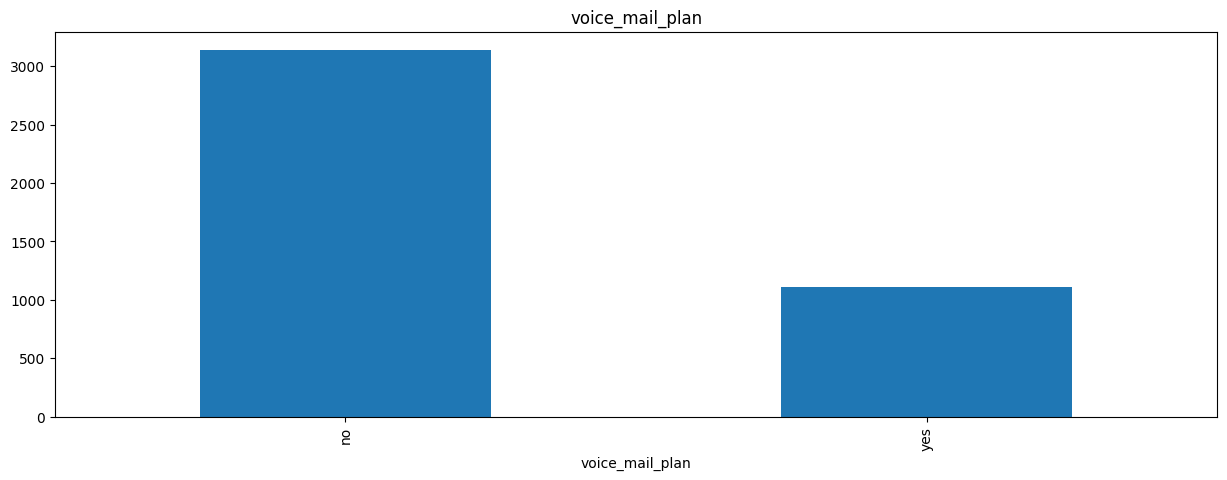

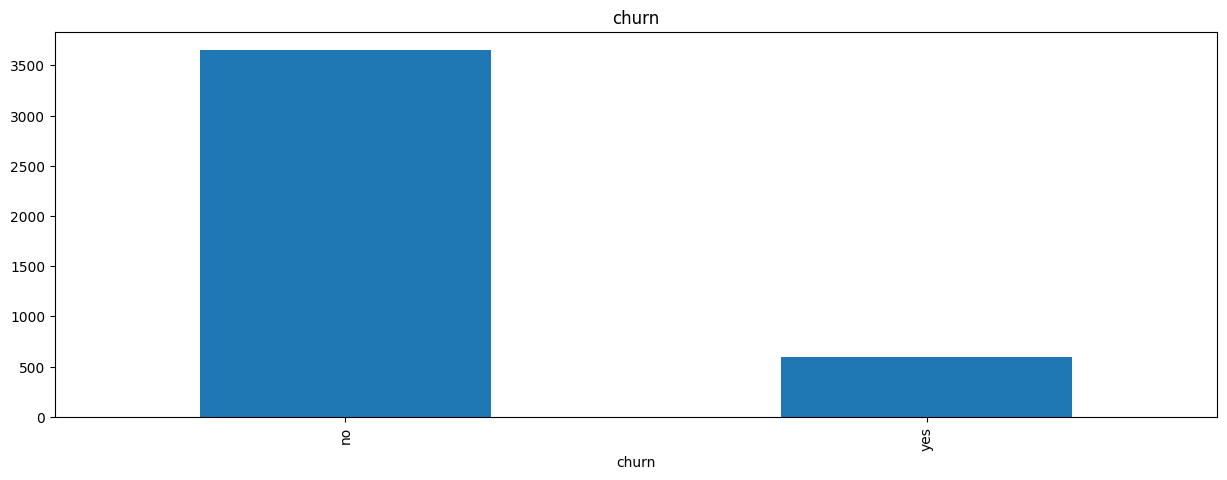

In [ ]:
for col in object_cols:
  customer_data[col].value_counts().plot(kind='bar', figsize=(15,5))
  plt.title(col)
  plt.show()

In [ ]:
num_unique_states = customer_data['state'].nunique()
print(num_unique_states)


51


In [ ]:
numeric_cols = [f for f in customer_data.columns if customer_data[f].dtype !="O"]
print(numeric_cols)

['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


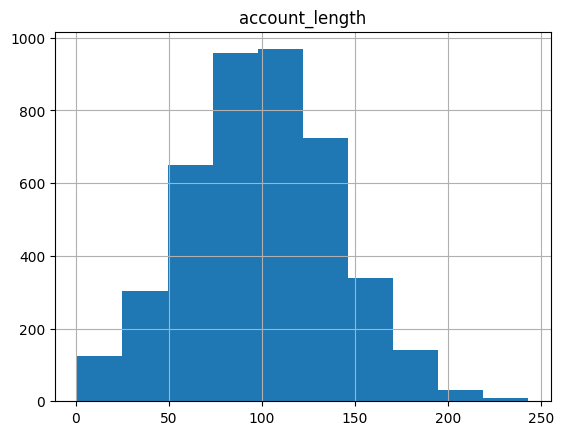

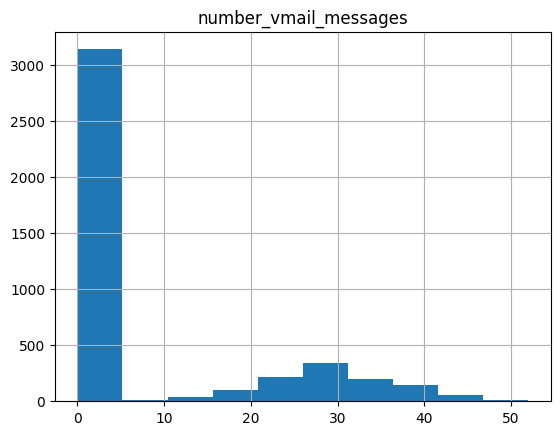

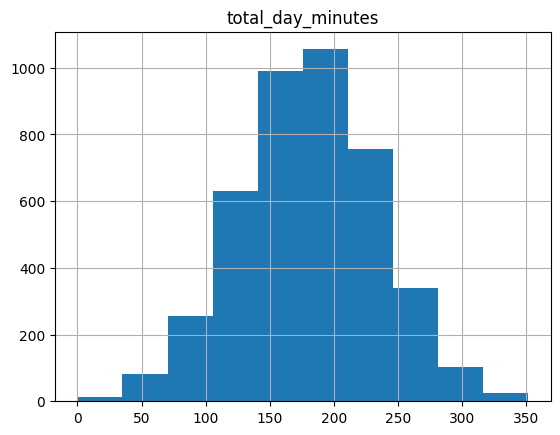

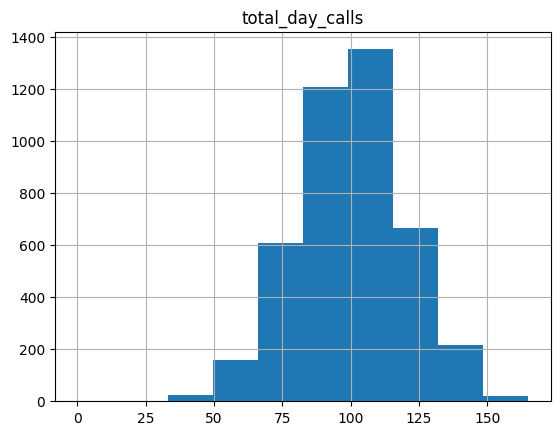

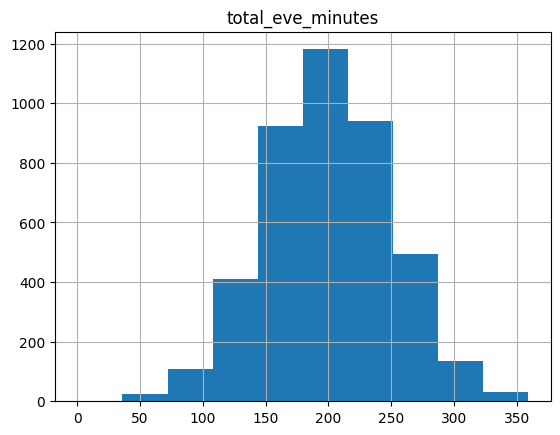

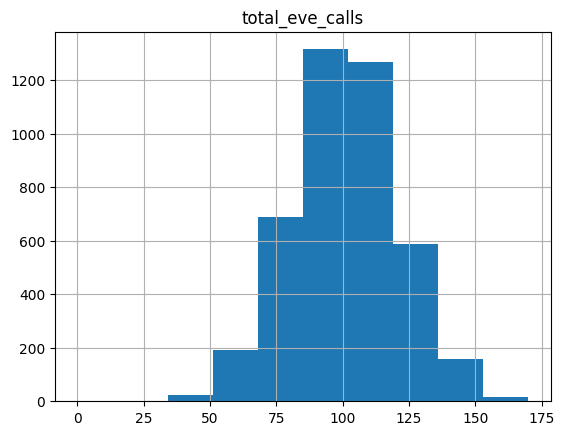

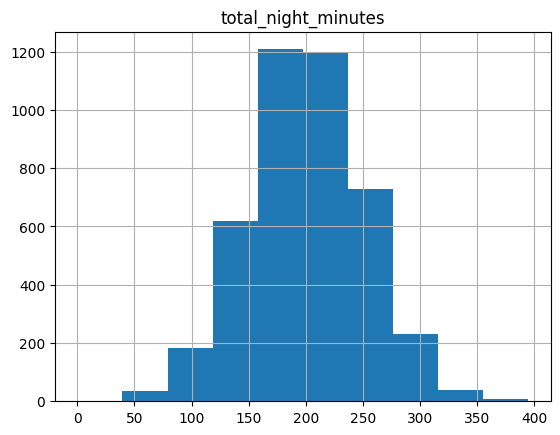

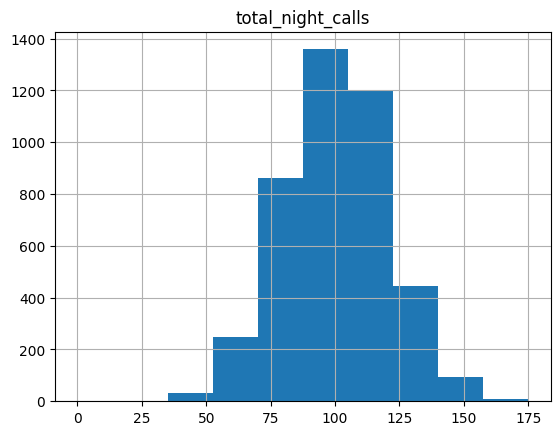

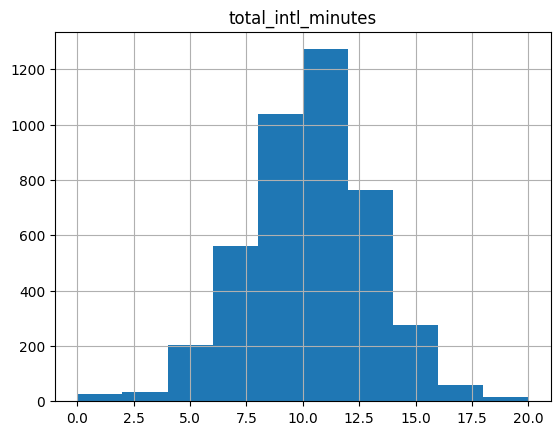

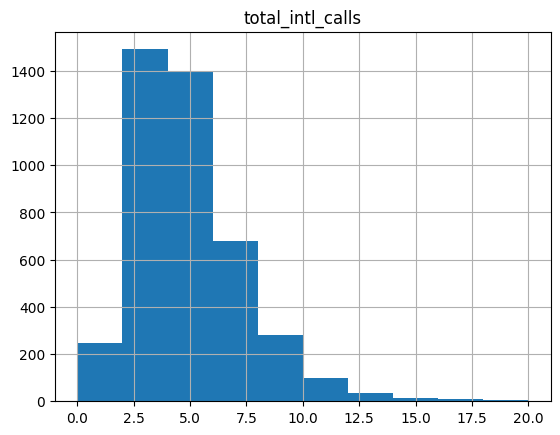

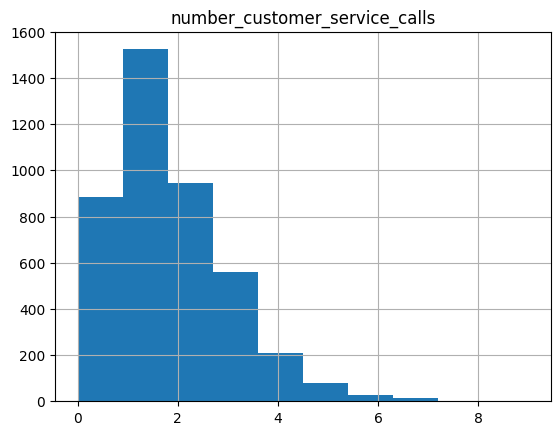

In [ ]:
for col in numeric_cols:
  customer_data[col].hist()
  plt.title(col)
  plt.show()

In [ ]:
numeric_cols = [
'account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls'
]


# Tiên xử lý dữ liệu để đưa vào model

In [ ]:
dataset = customer_data.copy()

In [ ]:
dataset

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


# Dữ liệu cột state cần xử lý One-Hot hoặc Hashing Encoding
Chọn cách xử lý Hashing Encoding vì cột state có tận 51 giá trị nếu xử lý One-hot sẽ tạo ra 51 cột làm tăng chiều dữ liệu .
# Dữ liệu các cột categorical còn lại xử lý One-Hot vì ít dữ liệu


In [ ]:
he = ce.HashingEncoder(cols=['state'])
dataset_hash = he.fit_transform(dataset)
dataset_hash

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,area_code,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,0,0,0,1,0,0,0,107,area_code_415,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,0,1,0,0,0,0,0,0,137,area_code_415,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,0,0,0,0,1,0,0,0,84,area_code_408,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,0,0,0,0,1,0,0,0,75,area_code_415,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,0,0,0,0,1,0,0,0,121,area_code_510,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0,0,1,0,0,0,0,0,83,area_code_415,...,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,0,0,0,0,0,0,1,0,73,area_code_408,...,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,1,0,0,0,0,0,0,0,75,area_code_408,...,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,0,0,0,0,0,0,1,0,50,area_code_408,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [ ]:
dataset_hash_dummy = pd.get_dummies(dataset_hash, drop_first=True).astype(int)
dataset_hash_dummy

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,number_vmail_messages,...,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes,churn_yes
0,0,0,0,0,1,0,0,0,107,26,...,11,13,3,3,1,1,0,0,1,0
1,0,1,0,0,0,0,0,0,137,0,...,7,12,5,3,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,84,0,...,8,6,7,1,2,0,0,1,0,0
3,0,0,0,0,1,0,0,0,75,0,...,8,10,3,2,3,1,0,1,0,0
4,0,0,0,0,1,0,0,0,121,24,...,9,7,7,2,3,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0,0,1,0,0,0,0,0,83,0,...,9,10,6,2,0,1,0,0,0,0
4246,0,0,0,0,0,0,1,0,73,0,...,8,11,6,3,3,0,0,0,0,0
4247,1,0,0,0,0,0,0,0,75,0,...,5,6,7,1,1,0,0,0,0,0
4248,0,0,0,0,0,0,1,0,50,40,...,13,9,5,2,2,0,0,0,1,0


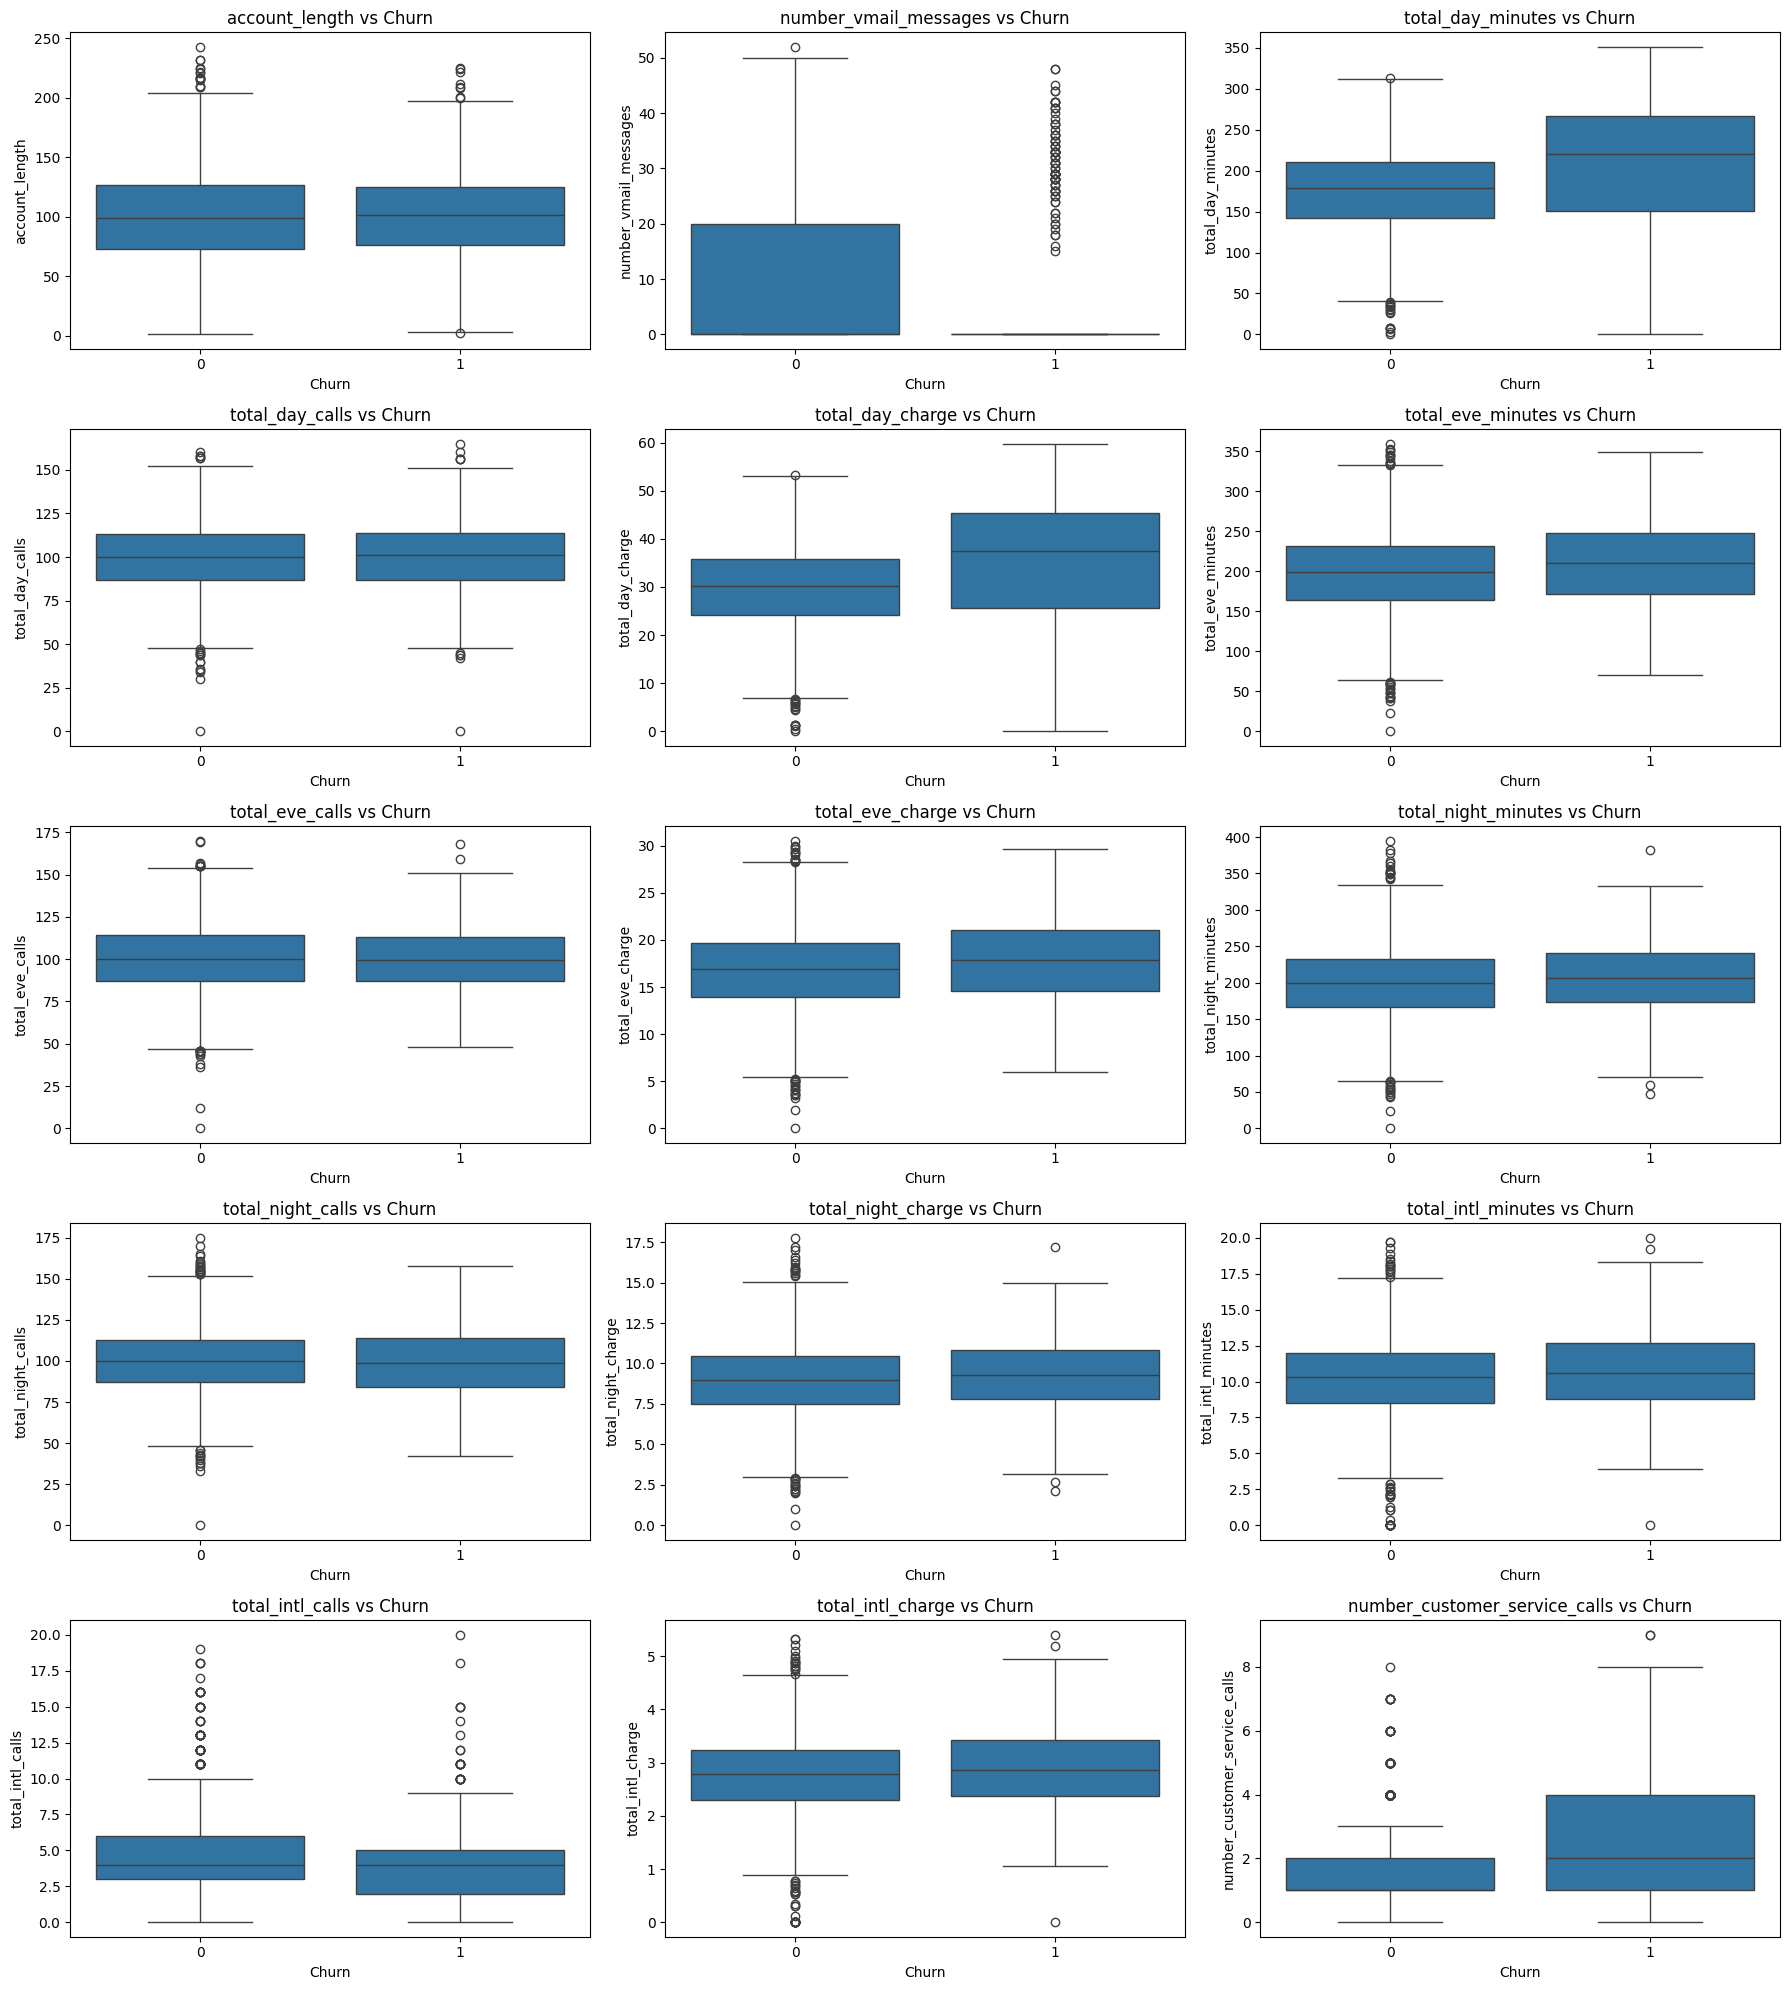

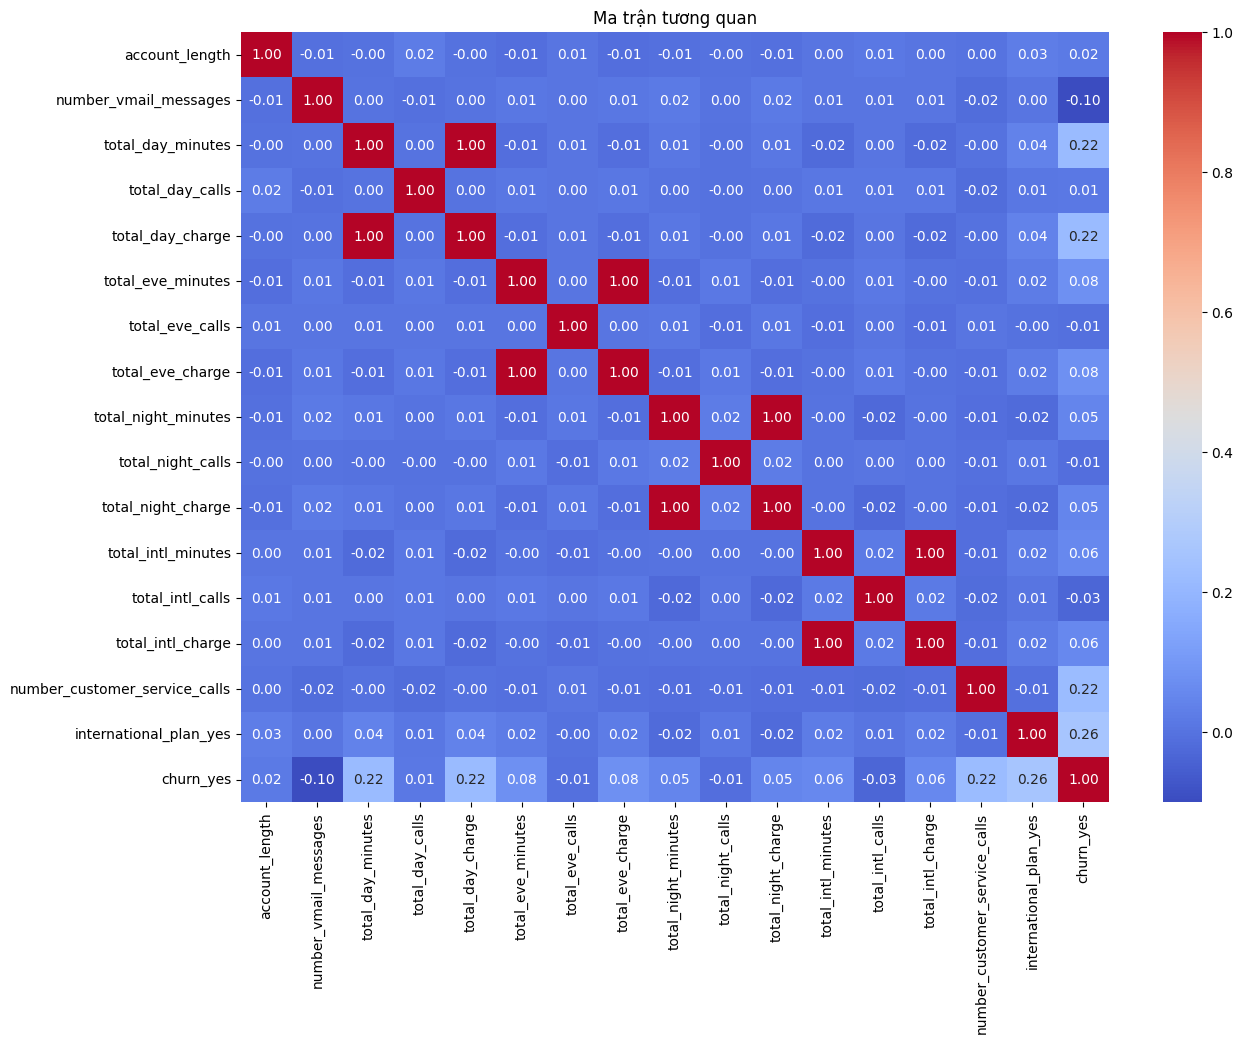

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(5, 3, figsize=(18, 20))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=customer_data, x='churn_yes', y=col, ax=axes[i])
    axes[i].set_title(f'{col} vs Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

# Ma trận tương quan
corr_cols = numeric_cols + ['international_plan_yes', 'churn_yes']
plt.figure(figsize=(14, 10))
sns.heatmap(customer_data[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Ma trận tương quan')
plt.show()

In [ ]:
corr = dataset_hash_dummy.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2)


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes,churn_yes
col_0,1.00,-0.20,-0.13,-0.15,-0.19,-0.11,-0.20,-0.14,0.01,-0.01,-0.01,-0.01,-0.01,0.00,0.04,0.00,-0.00,-0.02,-0.01,-0.00,0.02,0.00,-0.01,0.01,-0.02,-0.00,-0.01,-0.04
col_1,-0.20,1.00,-0.13,-0.16,-0.20,-0.11,-0.20,-0.15,-0.00,-0.02,0.03,0.02,0.03,-0.00,0.00,-0.01,-0.01,0.01,-0.01,0.01,0.01,0.01,0.02,0.01,-0.01,-0.01,-0.02,0.04
col_2,-0.13,-0.13,1.00,-0.10,-0.13,-0.07,-0.13,-0.09,-0.00,-0.03,-0.02,-0.01,-0.02,0.03,-0.04,0.02,-0.00,0.00,-0.00,-0.00,0.02,-0.00,-0.01,-0.01,0.00,-0.01,-0.02,0.01
col_3,-0.15,-0.16,-0.10,1.00,-0.16,-0.09,-0.16,-0.12,0.01,0.03,-0.01,0.02,-0.01,0.02,0.00,0.02,0.02,0.02,0.03,-0.00,-0.02,-0.00,0.01,0.02,-0.01,0.01,0.03,-0.01
col_4,-0.19,-0.20,-0.13,-0.16,1.00,-0.11,-0.20,-0.14,0.01,0.01,0.03,-0.00,0.03,0.01,0.01,0.01,0.03,-0.01,0.03,-0.01,-0.01,-0.01,-0.01,-0.02,-0.00,0.02,0.00,0.02
col_5,-0.11,-0.11,-0.07,-0.09,-0.11,1.00,-0.11,-0.08,-0.00,0.02,-0.02,-0.00,-0.02,0.01,-0.01,0.01,0.00,0.02,0.00,0.00,-0.03,0.00,0.01,-0.00,0.01,0.01,0.02,0.03
col_6,-0.20,-0.20,-0.13,-0.16,-0.20,-0.11,1.00,-0.15,-0.00,0.01,-0.00,-0.01,-0.00,-0.05,-0.03,-0.05,-0.02,0.01,-0.01,0.02,0.02,0.03,-0.00,0.00,0.01,-0.02,0.00,-0.03
col_7,-0.14,-0.15,-0.09,-0.12,-0.14,-0.08,-0.15,1.00,-0.02,-0.00,-0.02,-0.01,-0.02,-0.01,0.01,-0.01,-0.03,-0.01,-0.03,-0.03,-0.02,-0.03,-0.01,-0.02,0.03,0.01,0.01,-0.02
account_length,0.01,-0.00,-0.00,0.01,0.01,-0.00,-0.00,-0.02,1.00,-0.01,-0.00,0.02,-0.00,-0.01,0.01,-0.01,-0.01,-0.00,-0.01,0.00,0.01,0.00,0.00,-0.00,-0.02,0.03,0.00,0.02
number_vmail_messages,-0.01,-0.02,-0.03,0.03,0.01,0.02,0.01,-0.00,-0.01,1.00,0.00,-0.01,0.00,0.01,0.00,0.01,0.02,0.00,0.02,0.00,0.01,0.02,-0.02,0.01,-0.01,0.00,0.95,-0.10


In [ ]:
# Remove correlation columns
dataset_hash_dummy_drop_corr = dataset_hash_dummy.drop(columns=["voice_mail_plan_yes","total_day_charge","total_eve_charge","total_night_charge","total_intl_charge"])
dataset_hash_dummy_drop_corr

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,number_vmail_messages,...,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,area_code_area_code_415,area_code_area_code_510,international_plan_yes,churn_yes
0,0,0,0,0,1,0,0,0,107,26,...,103,254,103,13,3,1,1,0,0,0
1,0,1,0,0,0,0,0,0,137,0,...,110,162,104,12,5,0,1,0,0,0
2,0,0,0,0,1,0,0,0,84,0,...,88,196,89,6,7,2,0,0,1,0
3,0,0,0,0,1,0,0,0,75,0,...,122,186,121,10,3,3,1,0,1,0
4,0,0,0,0,1,0,0,0,121,24,...,108,212,118,7,7,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0,0,1,0,0,0,0,0,83,0,...,88,213,79,10,6,0,1,0,0,0
4246,0,0,0,0,0,0,1,0,73,0,...,82,186,89,11,6,3,0,0,0,0
4247,1,0,0,0,0,0,0,0,75,0,...,126,129,104,6,7,1,0,0,0,0
4248,0,0,0,0,0,0,1,0,50,40,...,126,297,116,9,5,2,0,0,0,0


In [ ]:
print(f"Số lượng features còn lại: {len(dataset_hash_dummy_drop_corr.columns)}")
print("Danh sách features:")
for col in dataset_hash_dummy_drop_corr.columns:
    print("-", col)


Số lượng features còn lại: 23
Danh sách features:
- col_0
- col_1
- col_2
- col_3
- col_4
- col_5
- col_6
- col_7
- account_length
- number_vmail_messages
- total_day_minutes
- total_day_calls
- total_eve_minutes
- total_eve_calls
- total_night_minutes
- total_night_calls
- total_intl_minutes
- total_intl_calls
- number_customer_service_calls
- area_code_area_code_415
- area_code_area_code_510
- international_plan_yes
- churn_yes


In [ ]:
# SMOTE & Scale
X = dataset_hash_dummy_drop_corr.drop(["churn_yes"],axis=1)
y = dataset_hash_dummy_drop_corr['churn_yes']

# Chia train ,test
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

# Upsampling = SMOTE
sm = SMOTE(k_neighbors=5)
X_train_resample, y_train_resample = sm.fit_resample(X_train,y_train)

#Scale

scale_columns = ['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_eve_minutes', 'total_eve_calls',
       'total_night_minutes', 'total_night_calls', 'total_intl_minutes',
       'total_intl_calls', 'number_customer_service_calls']



scaler = MinMaxScaler()
scaler.fit(X_train_resample[scale_columns])
X_train_resample[scale_columns] = scaler.transform(X_train_resample[scale_columns])
X_test[scale_columns] = scaler.transform(X_test[scale_columns])

# Training the Model

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       721
           1       0.59      0.34      0.43       129

    accuracy                           0.86       850
   macro avg       0.74      0.65      0.68       850
weighted avg       0.84      0.86      0.85       850



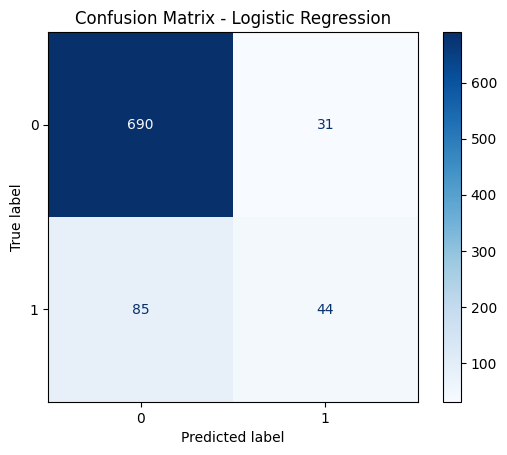

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       721
           1       0.57      0.71      0.64       129

    accuracy                           0.88       850
   macro avg       0.76      0.81      0.78       850
weighted avg       0.89      0.88      0.88       850



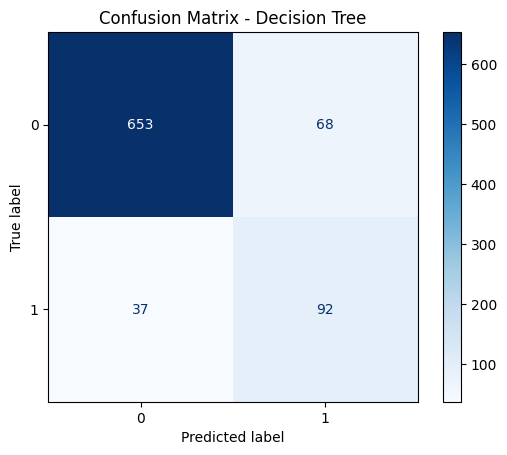

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       721
           1       0.25      0.33      0.28       129

    accuracy                           0.74       850
   macro avg       0.56      0.58      0.56       850
weighted avg       0.78      0.74      0.76       850



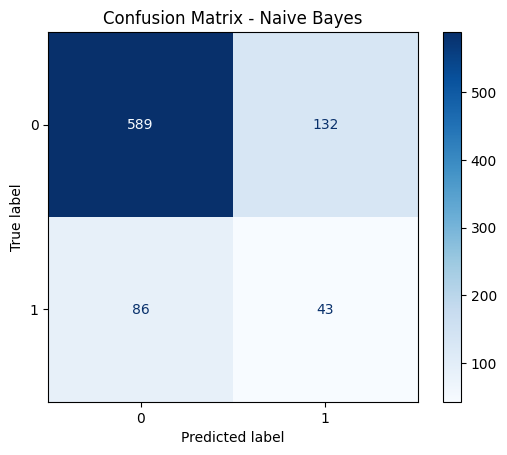

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

for name, model in models.items():
    model.fit(X_train_resample, y_train_resample)

    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))

    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()